In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

In [14]:
df = pd.read_csv('./data/insurance.csv')

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region']) 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


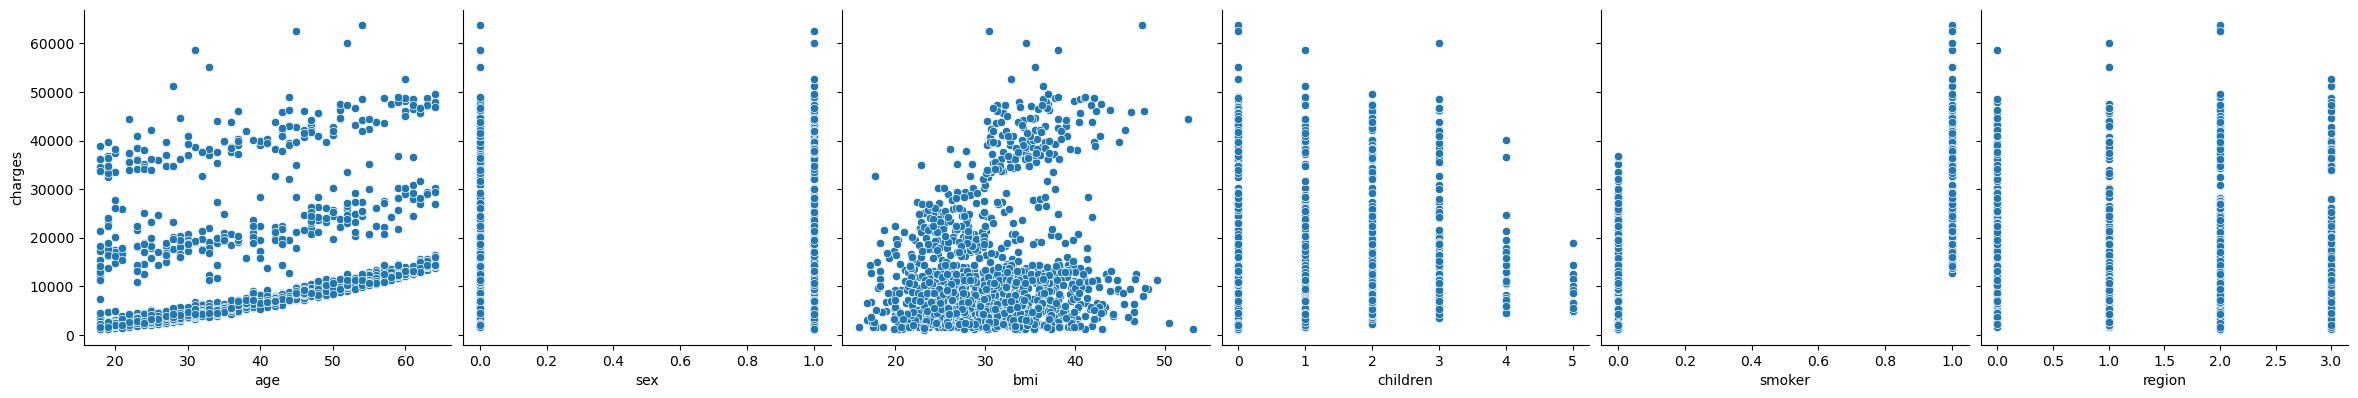

In [17]:
sns.pairplot(df, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

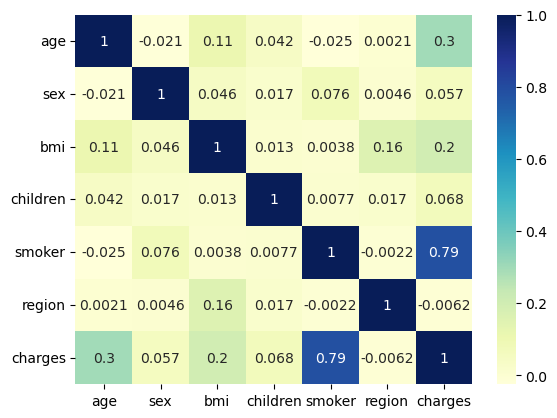

In [18]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=[float, int])
# Create the heatmap
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [19]:
X = df[['age', 'bmi', 'smoker']]
y = df['charges']

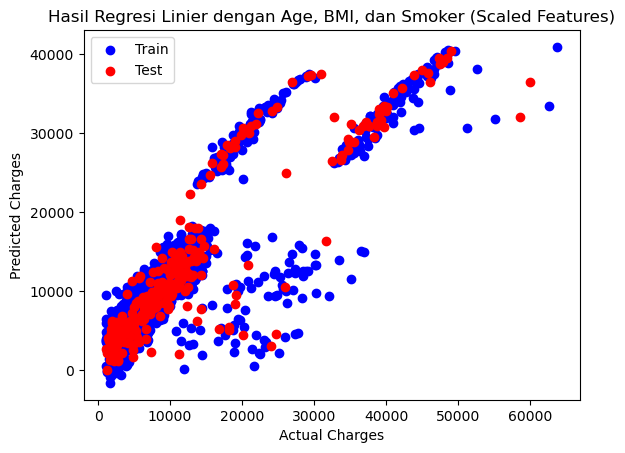

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the linear regression model
lr_model = LinearRegression()

# Train the model on the scaled training data
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled train and test data
y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)

# Visualize the regression results
plt.scatter(y_train, y_pred_train, color='blue', label='Train')
plt.scatter(y_test, y_pred_test, color='red', label='Test')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Hasil Regresi Linier dengan Age, BMI, dan Smoker (Scaled Features)')
plt.legend()
plt.show()


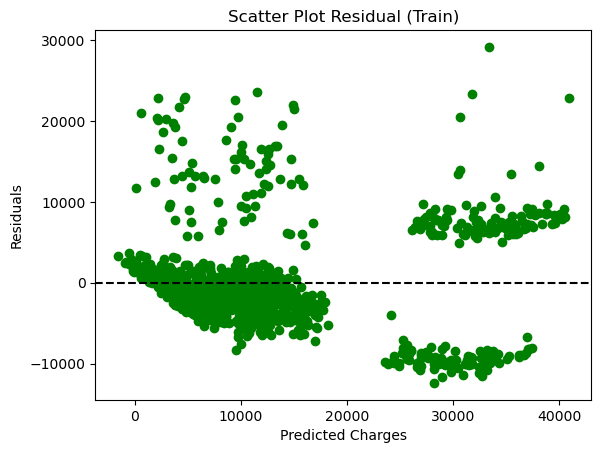

In [21]:
# Residual analysis (Train)
residuals_train = y_train - y_pred_train

# Scatter plot residual
plt.scatter(y_pred_train, residuals_train, color='green')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Scatter Plot Residual (Train)')
plt.show()

In [22]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

MSE: 32669703.021733705
MAE: 3927.5850813981415
RMSE: 5715.7416860573485
R-squared: 0.7916580391198963


In [23]:
# Initialize the scaler
svr_scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = svr_scaler.fit_transform(X_train)
X_test_scaled = svr_scaler.transform(X_test)

# Create and train the SVR model with an RBF kernel
svr_model = SVR(kernel='linear', C=100, epsilon=0.1, gamma='scale')
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')


MSE: 61352846.01211749
MAE: 4053.673658686278
RMSE: 7832.80575605686
R-squared: 0.6087392580447988


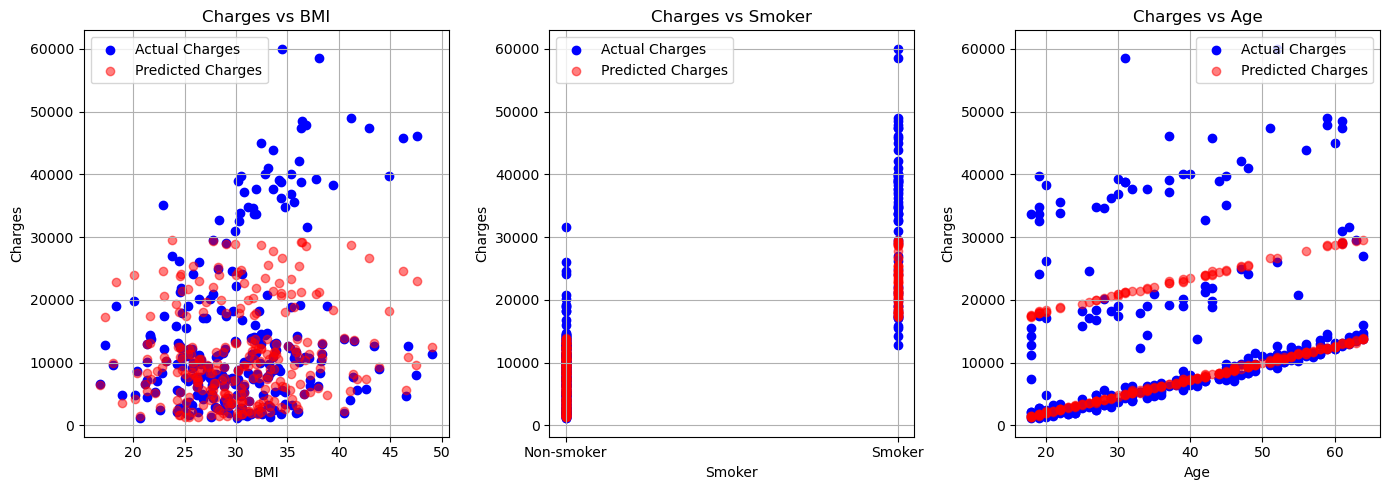

In [24]:
# Predict charges using the SVR model
y_pred = svr_model.predict(X_test_scaled)

# Add predictions to the test set for plotting
X_test['Predicted Charges'] = y_pred
X_test['Actual Charges'] = y_test.values

# Plotting Charges vs BMI
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_test['bmi'], X_test['Actual Charges'], color='blue', label='Actual Charges')
plt.scatter(X_test['bmi'], X_test['Predicted Charges'], color='red', label='Predicted Charges', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charges vs BMI')
plt.legend()
plt.grid(True)

# Plotting Charges vs Smoker
plt.subplot(1, 3, 2)
plt.scatter(X_test['smoker'], X_test['Actual Charges'], color='blue', label='Actual Charges')
plt.scatter(X_test['smoker'], X_test['Predicted Charges'], color='red', label='Predicted Charges', alpha=0.5)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges vs Smoker')
plt.xticks([0, 1], ['Non-smoker', 'Smoker'])
plt.legend()
plt.grid(True)

# Plotting Charges vs Age
plt.subplot(1, 3, 3)
plt.scatter(X_test['age'], X_test['Actual Charges'], color='blue', label='Actual Charges')
plt.scatter(X_test['age'], X_test['Predicted Charges'], color='red', label='Predicted Charges', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges vs Age')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
